In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head(30)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [27]:
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [28]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [29]:
label_encoder = LabelEncoder()
encoded_df = df.copy()
for column in encoded_df.select_dtypes(include=['object']).columns:
    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])
encoded_df.head(30)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


In [30]:
encoded_df.dtypes

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [31]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [32]:
encoded_df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,2.179650,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.889659,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,4.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


# Data Distribuions

## Distribution of Age


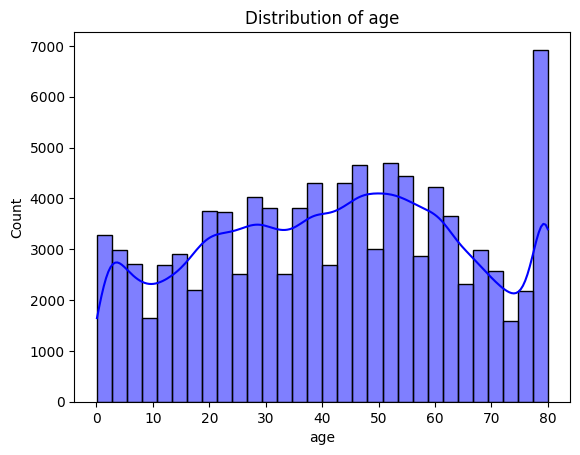

In [33]:
sns.histplot(encoded_df["age"], kde=True, bins=30, color = "blue")
plt.title("Distribution of age")
plt.show()

### Conclusion

The histogram illustrates the distribution of age in the dataset. The distribution shows that the age of the individuals is right-skewed, with the majority of individuals being older. There is a noticeable peak at the oldest age range, suggesting a higher concentration of individuals in that group.

---

## Distribution of BMI (Body Mass Index)

1. BMI and Type 2 Diabetes

Research has shown that a higher BMI is strongly associated with the development of Type 2 diabetes. People who are overweight (BMI > 25) or obese (BMI > 30) are more likely to develop diabetes. Excess weight can lead to insulin resistance, where the body’s ability to use insulin properly decreases, resulting in higher blood sugar levels.


2. BMI and Type 1 Diabetes
   
Type 1 diabetes is an autoimmune condition and is generally not directly related to BMI. However, people with lower body weight may have higher blood sugar levels due to the disease.

BMI formula
$$
BMI = \frac{Weight (kg)}{Height (m)^2}
$$


###  BMI Categories

| BMI Value   | Description         |
|-------------|---------------------|
| < 18.5      | Underweight         |
| 18.5–24.9   | **Normal weight**   |
| 25–29.9     | Overweight          |
| ≥ 30        | Obese               |


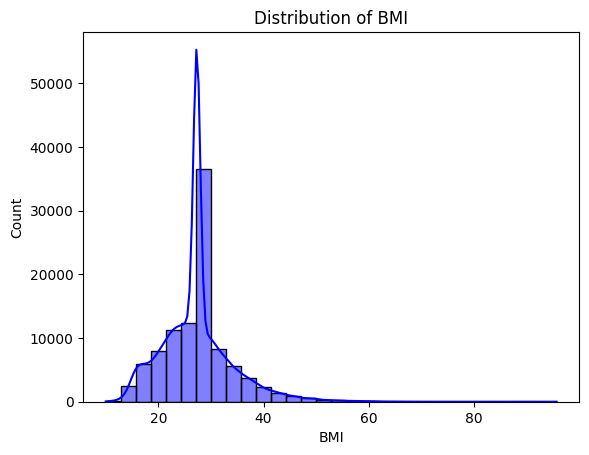

In [34]:
sns.histplot(encoded_df["bmi"],
            kde = True,
            bins = 30,
            color = "blue")
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.show()

### Conclusion

The distribution is right-skewed, showing a high concentration of individuals with BMIs in the lower range, likely representing those within the healthy weight category. As BMI values increase, the frequency of individuals decreases, with a long tail extending towards higher BMI values, indicating the presence of fewer individuals in the overweight and obese categories.

---

# Distribution of Blood Glucose Level

blood glucose level is a key factor in diagnosing and managing diabetes. It refers to the amount of sugar (glucose) present in the blood, which directly affects how the body functions. Maintaining a healthy blood glucose level is critical, as abnormal levels can lead to either hypoglycemia (low blood sugar) or hyperglycemia (high blood sugar), both of which are harmful and can lead to complications, including diabetes.

Formula for Estimating Blood Glucose:

$$
\text{Estimated Average Glucose (eAG)} = (28.7 \times \text{A1C}) - 46.7
$$
A1C (average blood glucose over time):

###  Blood Glucose Levels (Fasting)

| Glucose Level (mg/dL) | Category              |
|------------------------|------------------------|
| < 70                   | Low (Hypoglycemia)     |
| 70–99                 | **Normal (Fasting)**   |
| 100–125               | Prediabetes (Impaired fasting glucose) |
| ≥ 126                 | Diabetes               |

###  Blood Glucose Levels (2 Hours After Eating)

| Glucose Level (mg/dL) | Category              |
|------------------------|------------------------|
| < 140                 | **Normal**             |
| 140–199               | Prediabetes            |
| ≥ 200                 | Diabetes               |



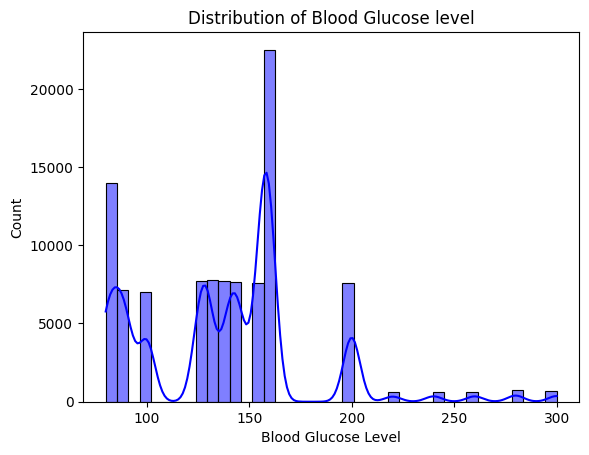

In [35]:
sns.histplot(encoded_df["blood_glucose_level"],
            kde = True,
            bins =40,
            color = "blue")
plt.title("Distribution of Blood Glucose level")
plt.xlabel("Blood Glucose Level")
plt.show()

### Conclusion

The distribution is multi-modal, indicating the presence of several distinct peaks. A significant portion of individuals have blood glucose levels concentrated around a specific point, while other smaller groups exhibit levels in different ranges. The distribution shows a general decrease in frequency as blood glucose levels rise.

---

# Distribution of Hemoglobin A1c (HbA1c)

## What is Hemoglobin A1c (HbA1c)?

**HbA1c** is a form of hemoglobin (a protein in red blood cells that carries oxygen) that is **chemically linked with glucose**. This linkage is called **glycation**.

When blood sugar levels are high, more glucose attaches to hemoglobin.  
Since red blood cells live about **3 months**, HbA1c reflects the **average blood sugar level over the past 2–3 months**.

## HbA1c Levels and Interpretation

| HbA1c (%)      | Estimated Average Glucose (mg/dL) | Diagnosis   |
|----------------|-----------------------------------|-------------|
| Below 5.7%     | < 117                             | Normal      |
| 5.7% – 6.4%     | 117 – 137                         | Prediabetes |
| 6.5% or more   | > 137                             | Diabetes    |

## HbA1c to Average Glucose Formula

You can estimate average blood glucose (eAG) from HbA1c using the following formulas:

### 🔹 In **mg/dL**:

$$
Estimated Average Glucose (eAG) = 28.7 × HbA1c - 46.7
$$

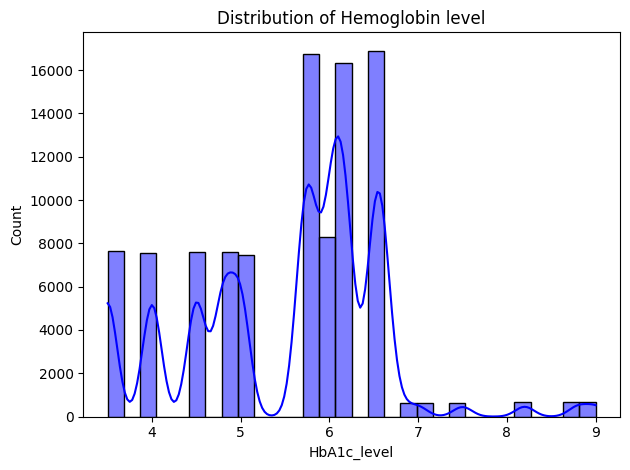

In [36]:
sns.histplot(encoded_df["HbA1c_level"], 
             kde=True, 
             bins=30, 
             color='blue')
plt.title("Distribution of Hemoglobin level")
plt.tight_layout()
plt.show()

### Conclusion

The distribution is multi-modal, with distinct peaks indicating concentrations of individuals at specific HbA1c levels. The most prominent peaks are observed at around **6%**, suggesting that a large portion of the population has HbA1c levels in that range. There are also smaller peaks at lower HbA1c levels, indicating other notable concentrations within the population.

---

# Compair Gender and Diabets

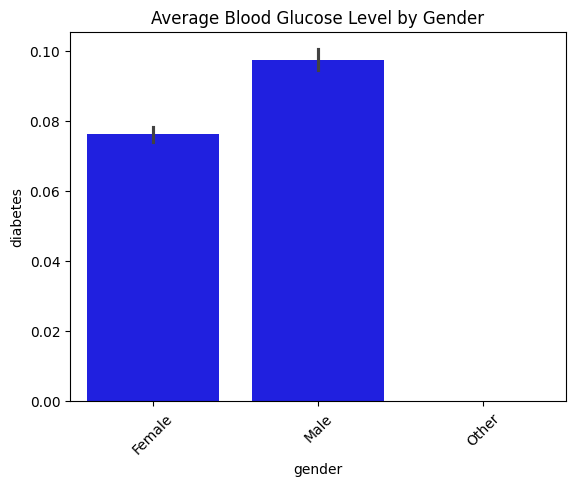

In [37]:
sns.barplot(x='gender', 
            y='diabetes', 
            data=df, 
            color="blue")
plt.xticks(rotation=45)
plt.title("Average Blood Glucose Level by Gender")
plt.show()

In this Graph we can see that Men have the highest rate and women the lowest, which may indicate a difference in diabetes risk between the genders.

---

# Checking Global Linear Dependence

### What is Matrix Rank and Why Do We Need It?

The **rank** of a matrix \( A \) is the **maximum number of linearly independent rows or columns** in the matrix.

It represents the **dimension of the column space** (or row space) of \( A \).

#### Why is Rank Important?

- Determines if a system of linear equations has a solution
- Checks for **linear independence** of vectors
- Helps find the **dimension** of the data in linear algebra and machine learning
- Indicates if a square matrix is **invertible**  
  (A square matrix is invertible if and only if its rank equals its size)

#### How to Find the Rank?

**If**  
$$
A \xrightarrow{\text{row reduction}} R,
$$  
**where \( R \) is the row echelon form of \( A \), then:**  
$$
\text{rank}(A) = \text{number of non-zero rows in } R
$$


In [38]:
rank = np.linalg.matrix_rank(encoded_df)
if rank < encoded_df.shape[1]:
    print("They are linearly dependent")
else:
    print("They are linearly independent")

They are linearly independent


## Conclusion
Since the rank equals the number of columns, the features (columns) in the dataset are linearly independent.
This means no column can be expressed as a linear combination of the others — each one adds unique information.

---


##  Correlation Matrix

The **correlation matrix** shows the strength and direction of the relationship between numerical variables. Values range from **-1 to 1**:

- `+1` → perfect positive correlation  
- `0` → no correlation  
- `-1` → perfect negative correlation

### Pearson Correlation Coefficient Formula:

$$
r_{xy} = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \sum{(y_i - \bar{y})^2}}}
$$

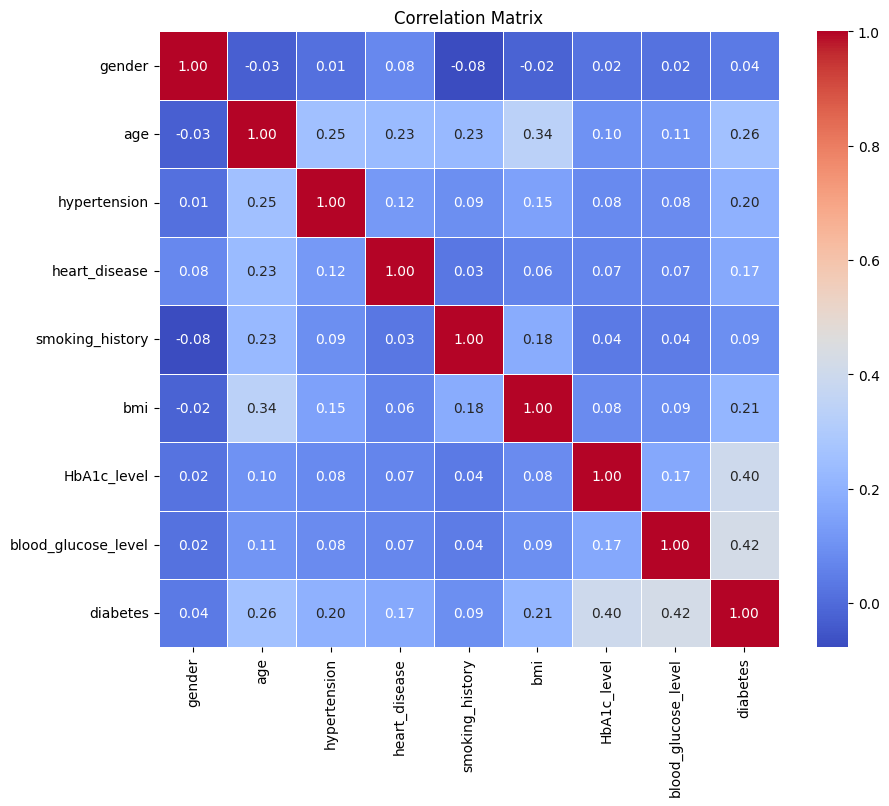

In [39]:
correlation_matrix = encoded_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Conclusion Based on the Correlation Matrix

### **Strongest Positive Correlations:**
1. **Blood Glucose Level and Diabetes (0.42):**
   - There is a moderate positive correlation between blood glucose level and diabetes, which is expected as higher blood glucose levels are a key indicator of diabetes.
   
2. **HbA1c Level and Diabetes (0.40):**
   - A moderate positive correlation exists between HbA1c level and diabetes. This further emphasizes the link between elevated blood sugar levels (as reflected by HbA1c) and diabetes.
   
3. **Age and BMI (0.34):**
   - There is a moderate positive correlation between age and BMI, suggesting that as people age, their BMI may increase, potentially indicating a higher risk of weight-related health issues.

### **Moderate Positive Correlations:**
1. **Age and Hypertension (0.25):**
   - A moderate positive correlation between age and hypertension, suggesting that as people get older, they may be more likely to develop high blood pressure.
   
2. **Age and Heart Disease (0.23):**
   - A positive correlation between age and heart disease, implying that older individuals may have a higher likelihood of developing heart disease.
   
3. **Hypertension and Diabetes (0.20):**
   - A weak to moderate positive correlation between hypertension and diabetes, suggesting that people with hypertension may be at a slightly higher risk for diabetes.
   
4. **Smoking History and Age (0.23):**
   - A positive correlation between smoking history and age, which could imply that older individuals are more likely to have a history of smoking.

### **Weak Positive Correlations:**
1. **BMI and Diabetes (0.21):**
   - A weak positive correlation between BMI and diabetes, which indicates that people with higher BMI may be more likely to have diabetes, but the relationship is not strong.

2. **Heart Disease and Diabetes (0.17):**
   - A weak positive correlation between heart disease and diabetes, suggesting that there may be a slight tendency for individuals with heart disease to also have diabetes.

### **Weak or Negligible Correlations:**
1. **Gender and Age (-0.03):**
   - There is a very weak negative correlation between gender and age, suggesting there is no significant difference in age between genders in this dataset.

2. **Gender and Other Health Variables (Close to 0):**
   - The correlations between gender and other variables such as hypertension, heart disease, smoking history, BMI, HbA1c level, and blood glucose level are all very weak or negligible, indicating that gender does not have a strong linear relationship with most of the health factors in the dataset.

---

## **Conclusion:**

- **Diabetes and Blood Glucose Control:**
   - The most important variables related to diabetes in this dataset are blood glucose levels and HbA1c levels, both of which show moderate to strong positive correlations with diabetes. These findings reinforce the direct link between blood sugar control and diabetes diagnosis.
   
- **Age-Related Health Risks:**
   - There are moderate correlations between age and various health issues such as hypertension, heart disease, and BMI, suggesting that as individuals age, their likelihood of developing these conditions increases.
   
- **Minor Relationships:**
   - Gender appears to have little influence on the health variables in this dataset, as evidenced by the weak or negligible correlations with most health indicators.
   
- **Other Risk Factors:**
   - There are also weak correlations between smoking history and various health factors, but smoking history alone does not strongly correlate with other conditions like diabetes or heart disease in this dataset.

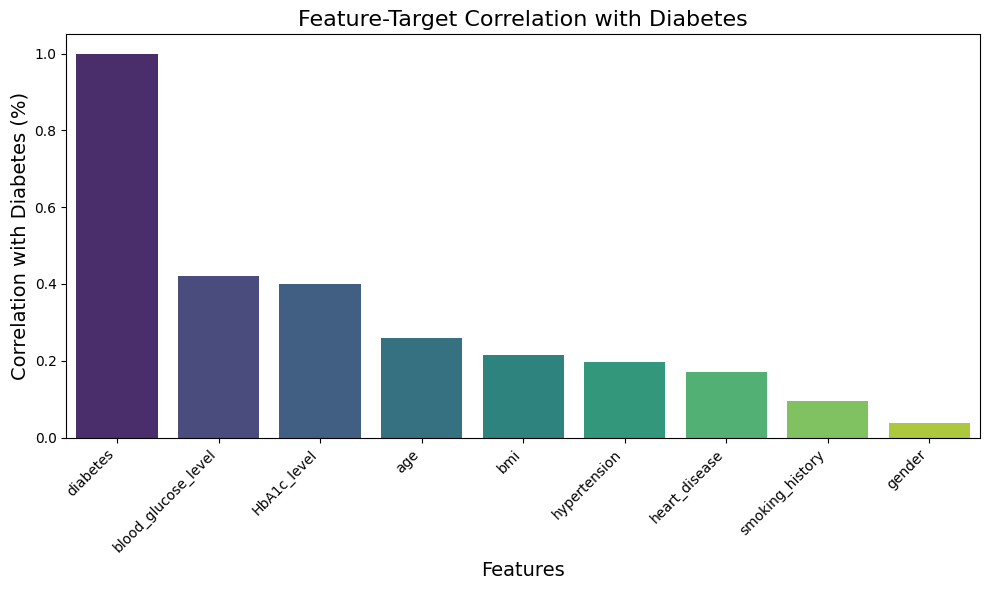

In [40]:
target_correlation = correlation_matrix["diabetes"].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlation.index, 
            y=target_correlation.values, 
            hue=target_correlation.index, 
            palette="viridis")
plt.title("Feature-Target Correlation with Diabetes", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Correlation with Diabetes (%)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Blood glucose level and HbA1c are the strongest predictors (correlation ~0.4)**

**Age, BMI, and hypertension form a second tier of predictors (correlation 0.2-0.3)**

**Heart disease and smoking history have weaker correlations (< 0.2)**

**Gender variables show minimal correlation with diabetes**

**This suggests a clear hierarchy of feature importance for modeling**

---

## Pie Chart Analysis: Positive Correlation with Diabetes

This pie chart visualizes how strongly each feature is positively correlated with **diabetes**, based on correlation coefficients. The percentages represent the proportion of each feature's correlation relative to the sum of all positive correlations.

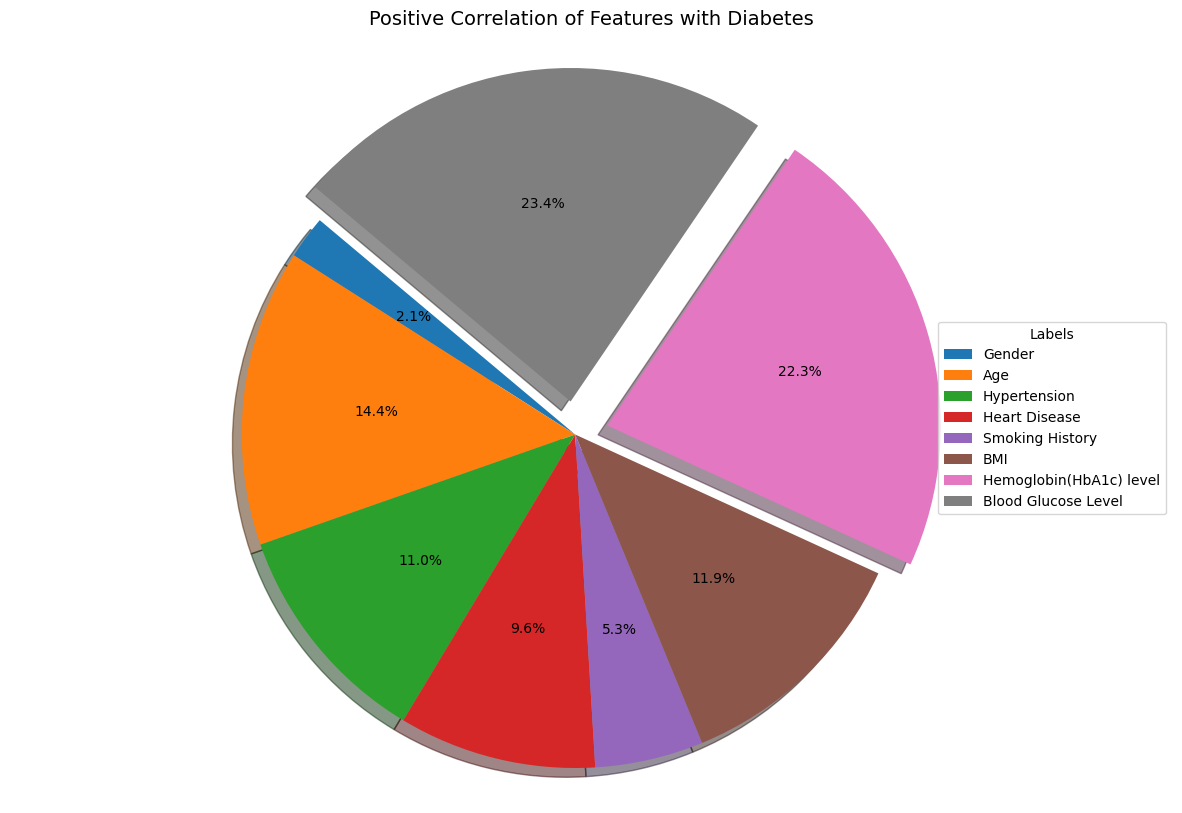

In [41]:
target_correlation = correlation_matrix["diabetes"].drop("diabetes")
positive_corr = target_correlation[target_correlation > 0]
labels = ["Gender","Age","Hypertension","Heart Disease","Smoking History","BMI","Hemoglobin(HbA1c) level","Blood Glucose Level"]
explode = [0,0,0,0,0,0,0.1,0.1]
plt.figure(figsize=(15, 10))
plt.pie(positive_corr,
        labels=None,
        explode=explode,
        autopct='%1.1f%%', 
        startangle=140, 
        shadow=True)
plt.title("Positive Correlation of Features with Diabetes", fontsize=14)
plt.legend(labels, loc="center right", title="Labels")
plt.axis('equal')
plt.show()



### Strongest Positive Correlations

- **`Blood Glucose Level`** (23.4%)
- **`Hemoglobin(HbA1c) level`** (22.3%)

These two features **together make up nearly half (45.7%)** of the total positive correlation. This is expected, as both directly measure blood sugar levels—making them the most important indicators for diabetes.

### Moderate Correlations

- **`Age`** (14.4%)
- **`BMI`** (11.9%)
- **`Hypertension`** (11.0%)

These features are important as well, but they have a relatively weaker correlation with diabetes compared to blood sugar indicators.

### Weaker Correlations

- **`Heart Disease`** (9.6%)
- **`Smoking History`** (5.3%)
- **`Gender`** (2.1%)

These have a **low positive correlation**, suggesting that they have a minor or weak impact on diabetes compared to the other variables.

---

### Conclusion

- The **most influential features** for predicting diabetes are **blood glucose level** and **HbA1c level**.
- **Age**, **BMI**, and **hypertension** are also **notable risk factors**.
- **Gender**, **smoking history**, and **heart disease** show **weaker associations** with diabetes.

---

# Target Data Destribution

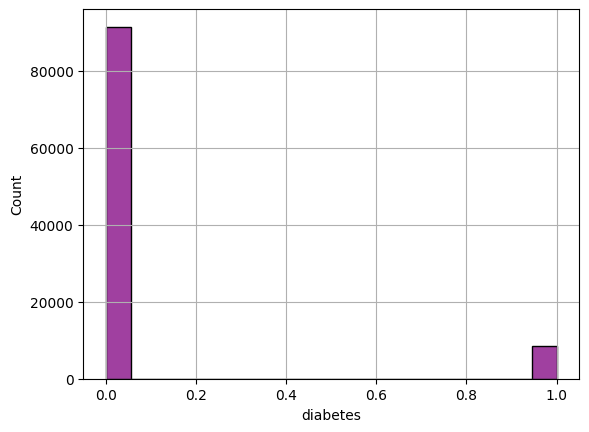

In [42]:
sns.histplot(encoded_df['diabetes'], color = "purple")
plt.grid(True)
plt.show()

### Conclusion

In the graph, we can see that the distribution of the target column, **diabetes** is heavily skewed.  The vast majority of observations are concentrated in the **0** category, indicating a large number of individuals without diabetes.  Conversely, the **1** category, representing those with diabetes, has a much smaller representation.  This substantial imbalance in the target column's distribution is a key characteristic of the dataset and should be considered in any subsequent analysis or modeling.

---

# Model Selection for this Data

In [43]:
X_train = encoded_df[:80000].drop(columns=['diabetes'])
y_train = encoded_df[:80000]['diabetes']

X_test = encoded_df[80000:].drop(columns=['diabetes'])
y_test = encoded_df[80000:]['diabetes']

### Scaling the Data with StandardScaler

The `StandardScaler` is used to standardize the features by removing the mean and scaling to unit variance. This means we transform the data such that:

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

Where:
- $ X $ is the original data,
- $ \mu $ is the mean of the data,
- $ \sigma $ is the standard deviation of the data.

#### Steps:
1. **Fitting and Transforming the Training Data**: 
   For the training data \( X_{\text{train}} \), we calculate the mean and standard deviation, then apply the formula to standardize it:
   
   $$
   X_{\text{train\_scaled}} = \frac{X_{\text{train}} - \mu_{\text{train}}}{\sigma_{\text{train}}}
   $$

#### Why Use StandardScaler?
Scaling the data helps machine learning algorithms perform better by ensuring all features have the same scale. Without scaling, features with larger ranges can dominate the model's performance, and the algorithm might struggle to converge.

---

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Applying SMOTE for Handling Imbalanced Data

The `SMOTE` algorithm is used to address class imbalance by generating synthetic samples for the minority class. This helps improve the performance of models on imbalanced datasets.

$$
\text{New Samples} = X_{\text{minority}} + \text{Noise}
$$

Where:
- $ X_{\text{minority}} $ is the data from the minority class,
- "Noise" is a small random perturbation added to create synthetic examples.

#### Why Use SMOTE?
When the dataset is imbalanced, models can be biased toward predicting the majority class. SMOTE helps by creating synthetic data points for the minority class, improving model performance on both classes.

#### Steps:
1. **Using SMOTE on the Training Data**: 
   We apply SMOTE to the scaled training data $  X_{\text{train}}  $ and corresponding labels $  y_{\text{train}} $ to generate a balanced dataset:
   
   $$
   (X_{\text{train\_resampled}}, y_{\text{train\_resampled}}) = \text{SMOTE}(X_{\text{train\_scaled}}, y_{\text{train}})
   $$

---

In [45]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

### Model Selection: CatBoost Classifier

For this project, I used a **CatBoost Classifier**, a gradient boosting algorithm designed to handle categorical and numerical data efficiently. This model was selected because:

- **High Performance**: CatBoost provides excellent accuracy out of the box and is known for outperforming many other algorithms in structured data tasks.
- **Imbalanced Data Handling**: The model performs well even when the dataset is imbalanced. Combined with resampling techniques like **SMOTE**, it improves sensitivity to minority class cases.
- **Minimal Preprocessing**: CatBoost handles categorical features natively and requires less data preprocessing compared to other models like XGBoost or LightGBM.
- **Robust to Overfitting**: With proper tuning of hyperparameters such as `iterations`, `learning_rate`, `depth`, and `l2_leaf_reg`, CatBoost is effective in managing overfitting.

The model was trained on **scaled and resampled data** using **SMOTE** to balance class distribution, and evaluated on a hold-out test set with performance metrics and learning curves plotted for analysis.


In [47]:
model = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.01,
    depth=7,
    l2_leaf_reg=8,
    random_state=42,
    verbose=100
)

eval_result = model.fit(
    X_train_scaled, 
    y_train, 
    eval_set=(X_test, y_test), 
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6686850	test: 0.7202797	best: 0.7202797 (0)	total: 40.5ms	remaining: 1m
100:	learn: 0.1099693	test: 3.1602616	best: 0.7202797 (0)	total: 2.13s	remaining: 29.5s
200:	learn: 0.0851620	test: 4.2886275	best: 0.7202797 (0)	total: 4.27s	remaining: 27.6s
300:	learn: 0.0810677	test: 4.7039119	best: 0.7202797 (0)	total: 6.45s	remaining: 25.7s
400:	learn: 0.0792690	test: 5.0962074	best: 0.7202797 (0)	total: 9.15s	remaining: 25.1s
500:	learn: 0.0781153	test: 5.3937350	best: 0.7202797 (0)	total: 12.3s	remaining: 24.4s
600:	learn: 0.0772603	test: 5.5266855	best: 0.7202797 (0)	total: 15.1s	remaining: 22.6s
700:	learn: 0.0765607	test: 5.7474046	best: 0.7202797 (0)	total: 17.6s	remaining: 20.1s
800:	learn: 0.0759733	test: 5.8791939	best: 0.7202797 (0)	total: 20.3s	remaining: 17.7s
900:	learn: 0.0754373	test: 6.0174918	best: 0.7202797 (0)	total: 23.3s	remaining: 15.5s
1000:	learn: 0.0749376	test: 6.0770701	best: 0.7202797 (0)	total: 26.1s	remaining: 13s
1100:	learn: 0.0744388	test: 6.232643

In [48]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict

cv = StratifiedKFold(
    n_splits = 7,
    shuffle = True,
    random_state = 42
)

y_pred_train_cv = cross_val_predict(
    model, 
    X_train_scaled, 
    y_train, 
    cv=cv, 
    method='predict'
)
train_cv_accuracy = accuracy_score(y_train, y_pred_train_cv)
train_cv_report = classification_report(y_train, y_pred_train_cv)
train_cv_conf_matrix = confusion_matrix(y_train, y_pred_train_cv)

0:	learn: 0.6688342	total: 44.7ms	remaining: 1m 7s
100:	learn: 0.1111875	total: 2.2s	remaining: 30.5s
200:	learn: 0.0840952	total: 4.25s	remaining: 27.4s
300:	learn: 0.0797467	total: 6.33s	remaining: 25.2s
400:	learn: 0.0778216	total: 8.44s	remaining: 23.1s
500:	learn: 0.0766818	total: 10.5s	remaining: 21s
600:	learn: 0.0757491	total: 12.7s	remaining: 19s
700:	learn: 0.0749651	total: 15s	remaining: 17.1s
800:	learn: 0.0743558	total: 17.2s	remaining: 15s
900:	learn: 0.0737441	total: 19.5s	remaining: 13s
1000:	learn: 0.0731818	total: 21.6s	remaining: 10.8s
1100:	learn: 0.0726040	total: 23.9s	remaining: 8.64s
1200:	learn: 0.0720740	total: 25.9s	remaining: 6.44s
1300:	learn: 0.0715330	total: 27.9s	remaining: 4.26s
1400:	learn: 0.0710328	total: 29.8s	remaining: 2.1s
1499:	learn: 0.0705487	total: 31.9s	remaining: 0us
0:	learn: 0.6688276	total: 43.7ms	remaining: 1m 5s
100:	learn: 0.1100682	total: 1.88s	remaining: 26s
200:	learn: 0.0854604	total: 4.13s	remaining: 26.7s
300:	learn: 0.0811917	to

In [54]:
print("\nTest Accuracy:", accuracy)
print("Test Classification Report:\n", report)
print("Test Confusion Matrix:\n", conf_matrix)

print("\nTraining (cross-validated) Accuracy:", train_cv_accuracy)
print("Training (cross-validated) Classification Report:\n", train_cv_report)
print("Training (cross-validated) Confusion Matrix:\n", train_cv_conf_matrix)


Test Accuracy: 0.9723
Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18324
           1       1.00      0.67      0.80      1676

    accuracy                           0.97     20000
   macro avg       0.99      0.83      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Test Confusion Matrix:
 [[18324     0]
 [  554  1122]]

Training (cross-validated) Accuracy: 0.9719125
Training (cross-validated) Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     73176
           1       0.98      0.69      0.81      6824

    accuracy                           0.97     80000
   macro avg       0.97      0.84      0.90     80000
weighted avg       0.97      0.97      0.97     80000

Training (cross-validated) Confusion Matrix:
 [[73065   111]
 [ 2136  4688]]


## Conclusion

The model achieves **97.23% accuracy** on the test set and **97.19% on the training set**, indicating strong generalization and minimal overfitting.

### Key Points:
- **Test Results:**  
  - **Class 0:** Outstanding performance — precision **(0.97)**, recall **(1.00)**.  
  - **Class 1:** High precision **(1.00)**, but recall is lower at **0.67**, suggesting some false negatives.

- **Training Results:**  
  - **Class 0:** Excellent metrics across the board — precision **(0.97)**, recall **(1.00)**.  
  - **Class 1:** Similar to test results, precision **(0.98)** is high, but recall is only **0.69**.

### Summary:
- The model is very strong at predicting the negative class (Class 0), almost perfectly.
- However, it struggles to capture all instances of the positive class (Class 1), which leads to lower recall.

###  **Confusion Matrix Overview**

A **confusion matrix** is a performance measurement tool used to evaluate the accuracy of a classification model. It provides a table that visualizes the actual vs. predicted values. The matrix consists of **four key elements**:

$$
\begin{bmatrix}
\text{True Positives (TP)} & \text{False Positives (FP)} \\
\text{False Negatives (FN)} & \text{True Negatives (TN)} \\
\end{bmatrix}
$$

Where:
- **True Positives (TP)**: The number of positive samples correctly predicted as positive.
- **True Negatives (TN)**: The number of negative samples correctly predicted as negative.
- **False Positives (FP)**: The number of negative samples incorrectly predicted as positive (Type I error).
- **False Negatives (FN)**: The number of positive samples incorrectly predicted as negative (Type II error).

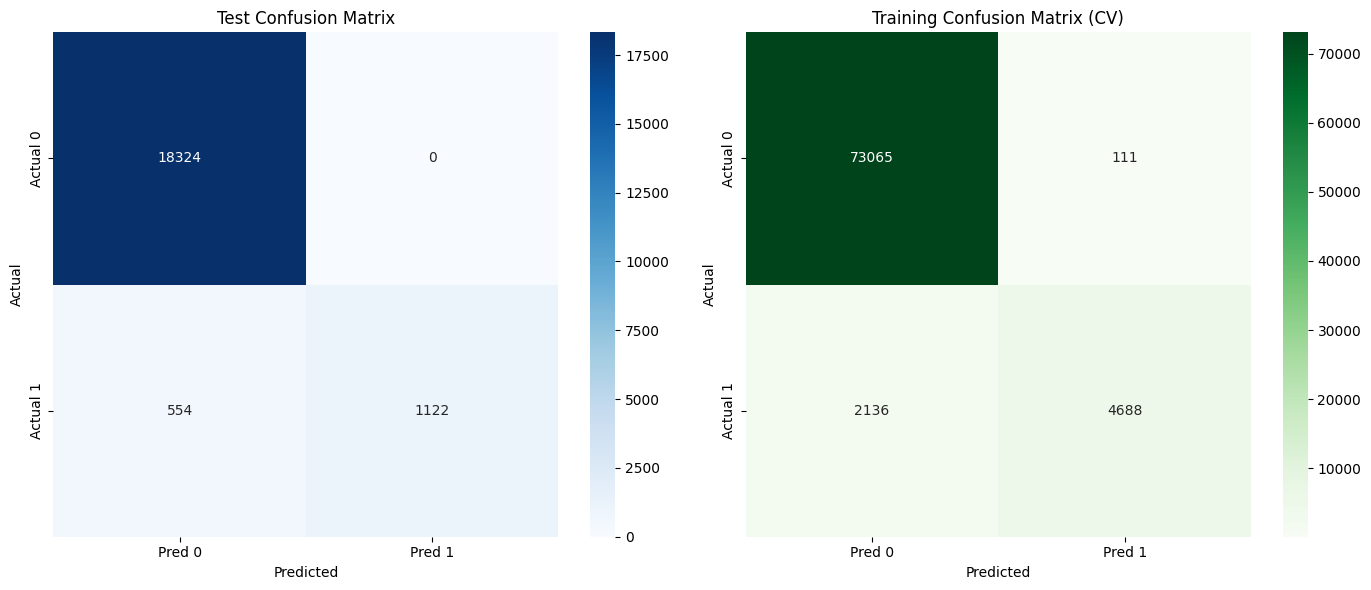

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'], ax=axes[0])
axes[0].set_title('Test Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
sns.heatmap(train_cv_conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'], ax=axes[1])
axes[1].set_title('Training Confusion Matrix (CV)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


## Conclusion:
The model has good predictive performance, with high True Positives and True Negatives on both training and test data.
The difference in False Positives and False Negatives between the test and training data  overall, the model is performing well on both seen and unseen data.


ROC-AUC Score: 0.9517


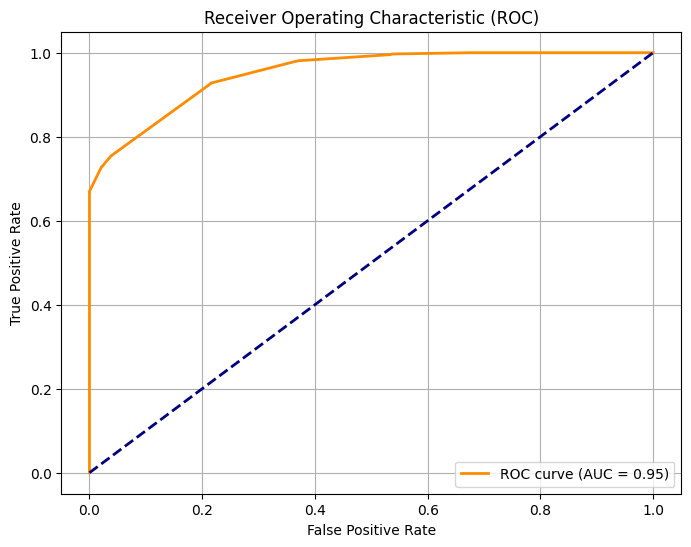

In [57]:
y_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

An **ROC-AUC score of 0.95** is a very good result!

- The ROC-AUC score ranges from **0 to 1**, with **1** indicating perfect classification and **0.5** indicating no better than random guessing.
- A score of **0.95** is very close to 1, meaning this model has excellent performance in distinguishing between the positive and negative classes. The closer the score is to 1, the better the model is at making correct predictions.

In short, this model is performing quite well in terms of classification ability.